<a href="https://colab.research.google.com/github/parvezmosaraf/Machine-Learning-Project/blob/main/Covid_and_Viral_Pneumonia_Prediction_using_MobilenetV2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import datetime as dt
import matplotlib.pyplot as plt

In [ ]:
IMAGE_SHAPE = (224, 224,3)

train_path = '/content/drive/MyDrive/jishan defence/Covid19-dataset/train'
test_path = '/content/drive/MyDrive/jishan defence/Covid19-dataset/test'

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   zoom_range = 0.2,
                                   rotation_range=10,
                                   brightness_range=[0.5, 1.5],
                                   vertical_flip=False,
                                   horizontal_flip = False)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 251 images belonging to 3 classes.


In [ ]:
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical',
                                            shuffle =False)

Found 66 images belonging to 3 classes.


In [ ]:

dense = tf.keras.applications.mobilenet_v2.MobileNetV2(input_shape=(224,224,3), weights='imagenet', include_top=False) #MobileNetV2 model algorithom download

for layer in dense.layers:
    layer.trainable = False

x = Flatten()(dense.output)
prediction = Dense(3, activation='softmax')(x) #customize the model with our dataset
model = Model(inputs=dense.input, outputs=prediction)

model.compile( #compiling our customize model
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

callbacks = [tf.keras.callbacks.TensorBoard(log_dir='log/{}'.format(dt.datetime.now().strftime("%Y-%m-%d-%H-%M-%S")))]

9420800/9406464 [==============================] - 0s 0us/step


In [ ]:
h=model.fit(
  training_set,
  validation_data=test_set,
  batch_size=32, #data train korbe 8 ta kore ekbare
  epochs=25, #hole data ke total 20 bar train korano hoi
  
)

Epoch 1/25
8/8 [==============================] - 14s 2s/step - loss: 0.0219 - accuracy: 0.9920 - val_loss: 0.6860 - val_accuracy: 0.9091
Epoch 2/25
8/8 [==============================] - 14s 2s/step - loss: 0.0868 - accuracy: 0.9880 - val_loss: 0.2778 - val_accuracy: 0.9394
Epoch 3/25
8/8 [==============================] - 14s 2s/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.3888 - val_accuracy: 0.9545
Epoch 4/25
8/8 [==============================] - 14s 2s/step - loss: 0.0862 - accuracy: 0.9880 - val_loss: 0.2601 - val_accuracy: 0.9545
Epoch 5/25
8/8 [==============================] - 13s 2s/step - loss: 0.0123 - accuracy: 0.9960 - val_loss: 0.5417 - val_accuracy: 0.9394
Epoch 6/25
8/8 [==============================] - 13s 2s/step - loss: 0.1472 - accuracy: 0.9801 - val_loss: 1.0106 - val_accuracy: 0.8939
Epoch 7/25
8/8 [==============================] - 14s 2s/step - loss: 0.1425 - accuracy: 0.9920 - val_loss: 0.4981 - val_accuracy: 0.9545
Epoch 8/25
8/8 [==================

In [ ]:
loss,test_accuracy =model.evaluate(test_set)
print('Accuracy on test:', test_accuracy)

3/3 [==============================] - 1s 419ms/step - loss: 0.2604 - accuracy: 0.9545
Accuracy on test: 0.9545454382896423


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
# T0 print the Classification Report
y_pred =model.predict(test_set)
y_pred = np.argmax(y_pred, axis=1)
print(classification_report(test_set.classes, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       0.95      0.90      0.92        20
           2       0.90      0.95      0.93        20

    accuracy                           0.95        66
   macro avg       0.95      0.95      0.95        66
weighted avg       0.96      0.95      0.95        66



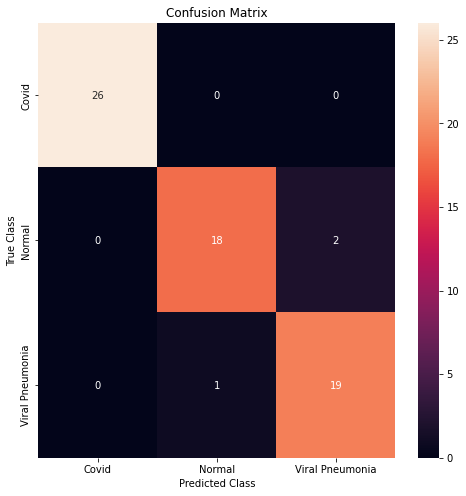

In [ ]:
# To print the Confusion Matrix
cf_matrix = confusion_matrix(test_set.classes,y_pred)
Labels = ['Covid','Normal','Viral Pneumonia']
plt.figure(figsize=(8, 8))
heatmap = sns.heatmap(cf_matrix, xticklabels=Labels, yticklabels=Labels, annot=True, fmt='d', color='blue')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm

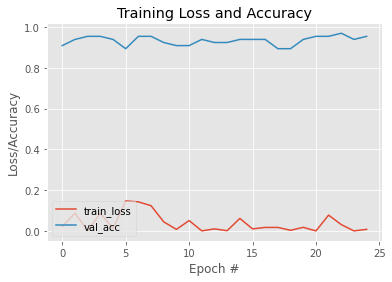

In [ ]:
# plot the training loss and accuracy
N = epochs=25
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), h.history["loss"], label="train_loss")
#plt.plot(np.arange(0, N), h.history["val_loss"], label="val_loss")
#plt.plot(np.arange(0, N), h.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), h.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig("plot.png")